In [58]:
import time
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

In [59]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# Extract data
with zipfile.ZipFile("/content/drive/MyDrive/data.zip","r") as zip_ref:
    zip_ref.extractall("")

In [61]:
# Define data directories
train_dir = 'data/training_set/'
test_dir = 'data/testing_set/'

In [62]:
# Image preprocessing for training and testing data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

In [63]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [64]:
# Load training and testing data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

Found 5990 images belonging to 4 classes.


In [65]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

Found 410 images belonging to 4 classes.


In [71]:
#  model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 63, 63, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 30, 30, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 256)       295168    
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 256)      

In [74]:
# Train model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=None,
    epochs=20,
    validation_data=test_generator)

<ipython-input-74-8ec12da3dd50>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
188/188 [==============================] - 149s 789ms/step - loss: 0.2642 - accuracy: 0.7492 - val_loss: 0.3395 - val_accuracy: 0.6927
Epoch 2/20
188/188 [==============================] - 143s 760ms/step - loss: 0.2440 - accuracy: 0.7770 - val_loss: 0.6191 - val_accuracy: 0.5463
Epoch 3/20
188/188 [==============================] - 144s 764ms/step - loss: 0.2219 - accuracy: 0.8010 - val_loss: 0.2926 - val_accuracy: 0.6829
Epoch 4/20
188/188 [==============================] - 142s 757ms/step - loss: 0.2094 - accuracy: 0.8180 - val_loss: 0.3290 - val_accuracy: 0.7098
Epoch 5/20
188/188 [==============================] - 145s 770ms/step - loss: 0.1942 - accuracy: 0.8301 - val_loss: 0.3133 - val_accuracy: 0.6951
Epoch 6/20
188/188 [==============================] - 162s 857ms/step - loss: 0.1715 - accuracy: 0.8533 - val_loss: 0.3619 - val_accuracy: 0.6878
Epoch 7/20
188/188 [==============================] - 146s 775ms/step - loss: 0.1687 - accuracy: 0.8548 - val_loss: 0.2582 -

In [75]:
from keras.models import load_model

model = load_model('drive/My Drive/HD/db/model1.h5')

predictions = model.predict(test_generator)

InvalidArgumentError: Graph execution error:

Detected at node sequential/dense/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-75-79d29a11ff1b>", line 5, in <cell line: 5>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 255, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [32,9408], In[1]: [43200,512]
	 [[{{node sequential/dense/Relu}}]] [Op:__inference_predict_function_58142]

In [82]:
# Get true labels
true_labels = test_generator.classes

In [83]:
# Threshold predictions
predicted_labels = predictions > 0.5

In [78]:
#  Confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)


In [79]:
# Print confusion matrix and accuracy
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[  0  80   0   0]
 [  0  10   0   0]
 [  0 160   0   0]
 [  0 160   0   0]]


In [81]:
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 2.4390243902439024


Text(0, 0.5, 'True Label')

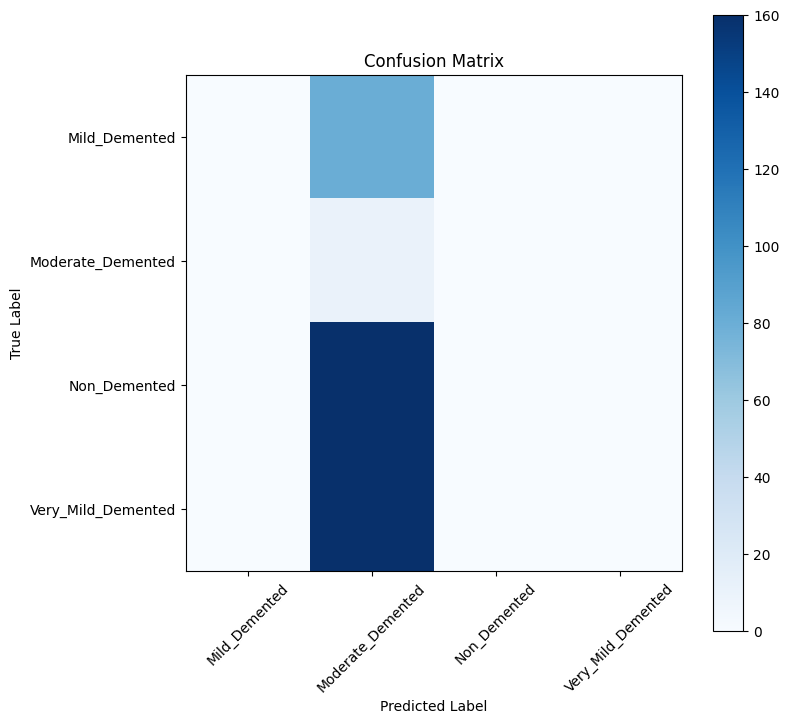

In [84]:
# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(test_generator.class_indices)), test_generator.class_indices.keys(), rotation=45)
plt.yticks(np.arange(len(test_generator.class_indices)), test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


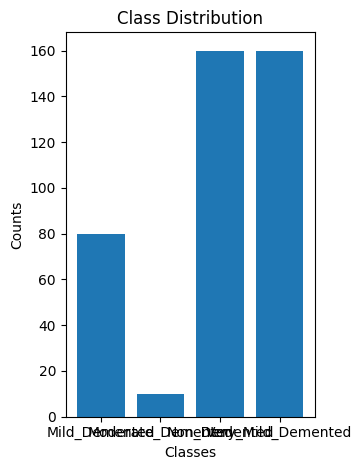

In [85]:
# Plot classes
plt.subplot(1, 2, 2)
classes = list(train_generator.class_indices.keys())
counts = [np.sum(true_labels == i) for i in range(len(classes))]
plt.bar(classes, counts)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [34]:
# Plot training history
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

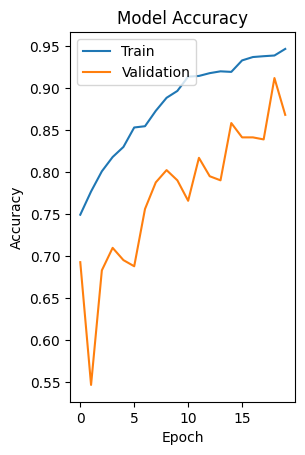

In [86]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

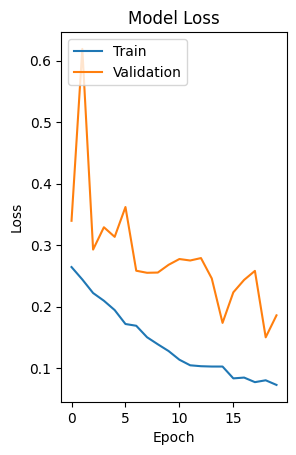

In [87]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')